In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


## بررسی دیتای موجود در فایل اکسل و آماده سازی برای مدلسازی

In [2]:
path='Case Study v2.xlsx'
df = pd.read_excel(path , header = 1)
df.head()
df["Year.Month"]=( df["Year"].map(str) + "-" + df["Month"].map(str))

df.head(12)

,Year,Month,Total Sales (lt.),Avg. Price,Total Visitors,Year.Month
0,1391,1,10531680,1338.424656,109167,1391-1
1,1391,2,11092325,1314.441618,122675,1391-2
2,1391,3,11529846,1267.542544,197621,1391-3
3,1391,4,12470776,1241.471640,621211,1391-4
4,1391,5,9386417,1183.481067,1025287,1391-5
5,1391,6,23008463,1184.665733,1162634,1391-6
6,1391,7,22429432,1473.179695,1204024,1391-7
7,1391,8,21829290,1448.554273,1296797,1391-8
8,1391,9,20312652,1407.730100,1242761,1391-9
9,1391,10,17036564,1343.253912,940092,1391-10


In [3]:
print(df.dtypes)

Year                   int64
Month                  int64
Total Sales (lt.)      int64
Avg. Price           float64
Total Visitors         int64
Year.Month            object
dtype: object


In [4]:
df.corr()

,Year,Month,Total Sales (lt.),Avg. Price,Total Visitors
Year,1.000000,0.000000,0.587881,-0.173317,0.280877
Month,0.000000,1.000000,0.373823,-0.104277,0.212999
Total Sales (lt.),0.587881,0.373823,1.000000,-0.090633,0.798103
Avg. Price,-0.173317,-0.104277,-0.090633,1.000000,0.117683
Total Visitors,0.280877,0.212999,0.798103,0.117683,1.000000


In [5]:
df[["Year.Month","Total Sales (lt.)","Total Visitors"]].corr()

,Total Sales (lt.),Total Visitors
Total Sales (lt.),1.000000,0.798103
Total Visitors,0.798103,1.000000


In [6]:
df.describe()

,Year,Month,Total Sales (lt.),Avg. Price,Total Visitors
count,84.000000,84.000000,8.400000e+01,84.000000,8.400000e+01
mean,1394.000000,6.500000,2.368040e+07,1298.038488,1.107748e+06
std,2.012012,3.472786,1.081927e+07,88.321310,8.599298e+05
min,1391.000000,1.000000,9.386417e+06,1110.010066,1.091670e+05
25%,1392.000000,3.750000,1.470340e+07,1240.662541,2.928985e+05
50%,1394.000000,6.500000,2.150731e+07,1310.456038,9.989895e+05
75%,1396.000000,9.250000,3.065333e+07,1356.125555,1.768229e+06
max,1397.000000,12.000000,5.410795e+07,1480.456245,2.958938e+06


In [7]:
df.rename(columns = {"Total Sales (lt.)":"total-sales" , "Avg. Price":"price", "Total Visitors":"visitor-count"}, inplace=True)

In [8]:
df.rename(columns = {"Year.Month":"YearMonth"}, inplace=True)
df.head()
df["YearMonth"].head()

0    1391-1
1    1391-2
2    1391-3
3    1391-4
4    1391-5
Name: YearMonth, dtype: object

In [9]:
df_grouped1 = df[[ "visitor-count" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot1 = df_grouped1.pivot(index='Month',columns='Year' )
grouped_pivot1
#grouped_test1 = df_grouped.groupby(['Year','Month'],as_index=False).mean()
#grouped_test1
#df_grouped

visitor-count                                                      
Year           1391     1392     1393     1394     1395     1396     1397
Month                                                                    
1            109167   193429   163762   191014   185250   237050   321649
2            122675   200530   177717   213713   130790   273661   338678
3            197621   342382   416671   394497   234879   351472   555738
4            621211   762860   850981  1229872   381755  1291423  1645636
5           1025287  1524465  1795721  1904656   842179  2836302  2632495
6           1162634  1590923  1651819  2094209   972692  2364090  2699313
7           1204024  1651515  1675665  2374920  1495475  2653089  2535211
8           1296797  1764298  1921727  2280414  1900188  2958938  2573362
9           1242761  1780022  1813285  1863004  1694792  2780427  2280596
10           940092  1321077  1329272  1231630  1091544  2125910  1745996
11           261403   384827   324385   292987   280403   406915   521983
12           149618   292633   219877   215233   272836   305663   363176

In [10]:
df_grouped2 = df[[ "total-sales" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot2 = df_grouped2.pivot(index='Month',columns='Year' )
grouped_pivot2

total-sales                                                            
Year         1391      1392      1393      1394      1395      1396      1397
Month                                                                        
1        10531680   9897895  10377855  13132710  14254781  16856155  19116119
2        11092325  11996181  11715255  14382015  14770331  17719258  15680096
3        11529846  13605550  10757321  17299581  16811921  19452838  25001183
4        12470776   9860760  12225821  12996478  13032680  20029563  25172370
5         9386417  16071715  18396228  23794063  26072814  31638072  39389006
6        23008463  21933011  23343470  31988689  30959867  37749583  43453786
7        22429432  26965259  29734800  34631527  40622825  45354085  51078457
8        21829290  27946429  33568231  37664850  42071050  48637430  54107954
9        20312652  21013882  26112186  30551157  32058153  38680629  44334795
10       17036564  17137397  21299808  20840530  30193637  35847161  33455127
11       13885878  15680246  22678915  21690979  25091277  23881994  29767464
12       14502602  12380988  15280240  20565090  21323637  23798443  34156221

In [11]:
df_grouped3 = df[[ "price" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot3 = df_grouped3.pivot(index='Month',columns='Year' )
grouped_pivot3

price                                                      \
Year          1391         1392         1393         1394         1395   
Month                                                                    
1      1338.424656  1333.127511  1336.600652  1302.081285  1386.637839   
2      1314.441618  1285.561727  1275.382302  1247.204296  1315.595672   
3      1267.542544  1437.263300  1238.235244  1185.555414  1260.149112   
4      1241.471640  1375.421594  1165.946558  1369.615516  1480.456245   
5      1183.481067  1328.909753  1344.622547  1355.963016  1433.161903   
6      1184.665733  1317.056247  1316.966256  1337.241633  1391.419323   
7      1473.179695  1296.315204  1367.613263  1349.386108  1373.563004   
8      1448.554273  1265.932816  1321.365471  1316.474252  1320.733658   
9      1407.730100  1408.927377  1251.293060  1211.107868  1244.800808   
10     1343.253912  1334.211531  1178.242053  1383.190494  1167.730589   
11     1318.241542  1267.057485  1129.666398  1317.324280  1110.010066   
12     1185.469013  1416.266817  1286.562142  1295.465359  1275.981331   

                                 
Year          1396         1397  
Month                            
1      1235.803252  1296.698781  
2      1176.955478  1246.825751  
3      1121.978530  1206.820355  
4      1436.173379  1356.613170  
5      1423.363111  1295.714585  
6      1416.281703  1272.804111  
7      1398.106321  1213.349962  
8      1346.923238  1181.450791  
9      1254.118471  1118.798098  
10     1165.537612  1306.470458  
11     1385.963593  1227.885769  
12     1349.526381  1185.217923

In [12]:
df_grouped4 = df[[ "visitor-count" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot4 = df_grouped4.pivot(index='Year',columns='Month' )
grouped_pivot4

visitor-count                                                      \
Month            1       2       3        4        5        6        7    
Year                                                                      
1391         109167  122675  197621   621211  1025287  1162634  1204024   
1392         193429  200530  342382   762860  1524465  1590923  1651515   
1393         163762  177717  416671   850981  1795721  1651819  1675665   
1394         191014  213713  394497  1229872  1904656  2094209  2374920   
1395         185250  130790  234879   381755   842179   972692  1495475   
1396         237050  273661  351472  1291423  2836302  2364090  2653089   
1397         321649  338678  555738  1645636  2632495  2699313  2535211   

                                                  
Month       8        9        10      11      12  
Year                                              
1391   1296797  1242761   940092  261403  149618  
1392   1764298  1780022  1321077  384827  292633  
1393   1921727  1813285  1329272  324385  219877  
1394   2280414  1863004  1231630  292987  215233  
1395   1900188  1694792  1091544  280403  272836  
1396   2958938  2780427  2125910  406915  305663  
1397   2573362  2280596  1745996  521983  363176

In [13]:
df_grouped5 = df[[ "total-sales" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot5 = df_grouped5.pivot(index='Year',columns='Month' )
grouped_pivot5

total-sales                                                              \
Month          1         2         3         4         5         6         7    
Year                                                                            
1391     10531680  11092325  11529846  12470776   9386417  23008463  22429432   
1392      9897895  11996181  13605550   9860760  16071715  21933011  26965259   
1393     10377855  11715255  10757321  12225821  18396228  23343470  29734800   
1394     13132710  14382015  17299581  12996478  23794063  31988689  34631527   
1395     14254781  14770331  16811921  13032680  26072814  30959867  40622825   
1396     16856155  17719258  19452838  20029563  31638072  37749583  45354085   
1397     19116119  15680096  25001183  25172370  39389006  43453786  51078457   

                                                         
Month        8         9         10        11        12  
Year                                                     
1391   21829290  20312652  17036564  13885878  14502602  
1392   27946429  21013882  17137397  15680246  12380988  
1393   33568231  26112186  21299808  22678915  15280240  
1394   37664850  30551157  20840530  21690979  20565090  
1395   42071050  32058153  30193637  25091277  21323637  
1396   48637430  38680629  35847161  23881994  23798443  
1397   54107954  44334795  33455127  29767464  34156221

In [14]:
df_grouped6 = df[[ "price" , "Year","Month" ]].groupby(["Year" ,"Month"] , as_index = False).mean()
grouped_pivot6 = df_grouped6.pivot(index='Year',columns='Month' )
grouped_pivot6

price                                                      \
Month           1            2            3            4            5    
Year                                                                     
1391   1338.424656  1314.441618  1267.542544  1241.471640  1183.481067   
1392   1333.127511  1285.561727  1437.263300  1375.421594  1328.909753   
1393   1336.600652  1275.382302  1238.235244  1165.946558  1344.622547   
1394   1302.081285  1247.204296  1185.555414  1369.615516  1355.963016   
1395   1386.637839  1315.595672  1260.149112  1480.456245  1433.161903   
1396   1235.803252  1176.955478  1121.978530  1436.173379  1423.363111   
1397   1296.698781  1246.825751  1206.820355  1356.613170  1295.714585   

                                                                        \
Month           6            7            8            9            10   
Year                                                                     
1391   1184.665733  1473.179695  1448.554273  1407.730100  1343.253912   
1392   1317.056247  1296.315204  1265.932816  1408.927377  1334.211531   
1393   1316.966256  1367.613263  1321.365471  1251.293060  1178.242053   
1394   1337.241633  1349.386108  1316.474252  1211.107868  1383.190494   
1395   1391.419323  1373.563004  1320.733658  1244.800808  1167.730589   
1396   1416.281703  1398.106321  1346.923238  1254.118471  1165.537612   
1397   1272.804111  1213.349962  1181.450791  1118.798098  1306.470458   

                                 
Month           11           12  
Year                             
1391   1318.241542  1185.469013  
1392   1267.057485  1416.266817  
1393   1129.666398  1286.562142  
1394   1317.324280  1295.465359  
1395   1110.010066  1275.981331  
1396   1385.963593  1349.526381  
1397   1227.885769  1185.217923

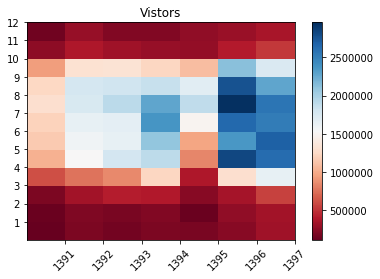

In [15]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu' )
ax.set_title("Vistors")
#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index
#a=set["Farvardin" , "Ordibehesht" , "Khordad" , "Tir" , "Mordad","Shahriver" , "Mehr" , "Aban" , "Azar" , "Dey","Bahman","Esfand"]
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 1 , minor=False )
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 1, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)


fig.colorbar(im)
plt.show()

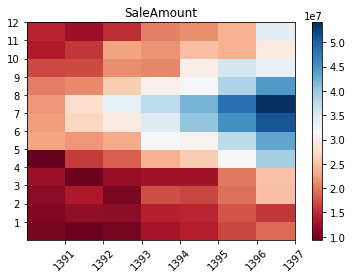

In [16]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu' )
ax.set_title("SaleAmount")
#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index
#a=set["Farvardin" , "Ordibehesht" , "Khordad" , "Tir" , "Mordad","Shahriver" , "Mehr" , "Aban" , "Azar" , "Dey","Bahman","Esfand"]
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 1 , minor=False )
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 1, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)


fig.colorbar(im)
plt.show()

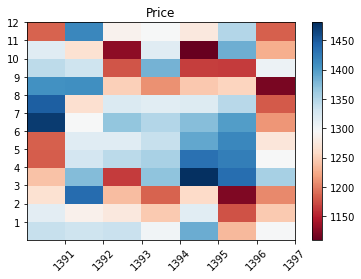

In [17]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot3, cmap='RdBu' )
ax.set_title("Price")
#label names
row_labels = grouped_pivot3.columns.levels[1]
col_labels = grouped_pivot3.index
#a=set["Farvardin" , "Ordibehesht" , "Khordad" , "Tir" , "Mordad","Shahriver" , "Mehr" , "Aban" , "Azar" , "Dey","Bahman","Esfand"]
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot3.shape[1]) + 1 , minor=False )
ax.set_yticks(np.arange(grouped_pivot3.shape[0]) + 1, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)


fig.colorbar(im)
plt.show()

## در ادامه محاسبه
## P_Value , Pearson Correlation

## مفاهیم :
همبستگی: اندازه گیری میزان وابستگی متقابل بین متغیرها.

علیت: رابطه بین علت و اثر بین دو متغیر.  
همبستگی پیرسون

همبستگی پیرسون وابستگی خطی بین دو متغیر را اندازه گیری می کند.

ضریب حاصل یک ارزش بین است -1 و 1 شامل:  
  
1: مجموع همبستگی خطی مثبت.  
0: هیچ همبستگی خطی, دو متغیر به احتمال زیاد یکدیگر تاثیر نمی گذارد.  
-1: مجموع همبستگی خطی منفی.  


 تخمین همبستگی.

P_Value:
 به طور معمول سطح اهمیت 0.05 را انتخاب می کنیم که به این معنی است که ما 95 درصد اعتماد داریم که ارتباط بین متغیرها قابل توجه است.

توسط کنوانسیون, وقتی که

P_Value <0.001:  
  شواهد قوی وجود دارد که همبستگی قابل توجه است.  
P_Value < 0.05:  
 شواهد متوسط وجود دارد که همبستگی قابل توجه است.  
P_Value  < 0.1:  
 شواهد ضعیفی وجود دارد که همبستگی قابل توجه است.  
P_Value  > 0.1:  
 شواهدی وجود ندارد که همبستگی قابل توجه باشد.  

In [18]:
pearson_coef, p_value = stats.pearsonr(df['total-sales'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.09063298205331155  with a P-value of P = 0.41226868526517135


In [19]:
pearson_coef, p_value = stats.pearsonr(df['visitor-count'], df['total-sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.798102625630475  with a P-value of P = 9.91977424362288e-20


In [20]:
pearson_coef, p_value = stats.pearsonr(df['price'], df['visitor-count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.11768256162127158  with a P-value of P = 0.2863662187089327


In [21]:
#pearson_coef, p_value = stats.pearsonr(df['total-sales'], df[['Year','Month']].astype(float))
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [22]:
#pearson_coef, p_value = stats.pearsonr(df['price'], df['YearMonth'].astype(float))
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [23]:
pearson_coef, p_value = stats.pearsonr(df['price'], df['total-sales'].astype(float))
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.09063298205331155  with a P-value of P = 0.41226868526517135


In [24]:
pearson_coef, p_value = stats.pearsonr(df['price'], df['Year'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.17331661514798996  with a P-value of P = 0.11488096561314082


In [25]:
pearson_coef, p_value = stats.pearsonr(df['price'], df['Month'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.10427684635687631  with a P-value of P = 0.34518522674237884


In [26]:
pearson_coef, p_value = stats.pearsonr(df['Year'], df['visitor-count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.28087665817517254  with a P-value of P = 0.009652727096116248


In [27]:
pearson_coef, p_value = stats.pearsonr(df['Month'], df['visitor-count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.21299865948545213  with a P-value of P = 0.051738949446937285


In [28]:
pearson_coef, p_value = stats.pearsonr(df['Year'], df['total-sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5878807504352797  with a P-value of P = 4.1170787334693265e-09


In [29]:
pearson_coef, p_value = stats.pearsonr(df['Month'], df['total-sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3738233803389914  with a P-value of P = 0.0004605510073438188


## آماده سازی مدل رگرسیون خطی

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
X = df[['Year' , 'Month']]
Y = df['price']

In [32]:
lm = LinearRegression()
lm
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
Yhat=lm.predict(X)
Yhat[0::]   

array([1335.44879312, 1332.79678164, 1330.14477017, 1327.4927587 ,
       1324.84074722, 1322.18873575, 1319.53672428, 1316.88471281,
       1314.23270133, 1311.58068986, 1308.92867839, 1306.27666691,
       1327.84071244, 1325.18870097, 1322.5366895 , 1319.88467803,
       1317.23266655, 1314.58065508, 1311.92864361, 1309.27663213,
       1306.62462066, 1303.97260919, 1301.32059771, 1298.66858624,
       1320.23263177, 1317.5806203 , 1314.92860883, 1312.27659735,
       1309.62458588, 1306.97257441, 1304.32056293, 1301.66855146,
       1299.01653999, 1296.36452851, 1293.71251704, 1291.06050557,
       1312.6245511 , 1309.97253963, 1307.32052815, 1304.66851668,
       1302.01650521, 1299.36449373, 1296.71248226, 1294.06047079,
       1291.40845931, 1288.75644784, 1286.10443637, 1283.4524249 ,
       1305.01647043, 1302.36445895, 1299.71244748, 1297.06043601,
       1294.40842453, 1291.75641306, 1289.10440159, 1286.45239012,
       1283.80037864, 1281.14836717, 1278.4963557 , 1275.84434

In [34]:
lm.intercept_

11920.941020110527

In [35]:
lm.coef_


array([-7.60808067, -2.65201147])

(0, 1499.8453460252426)

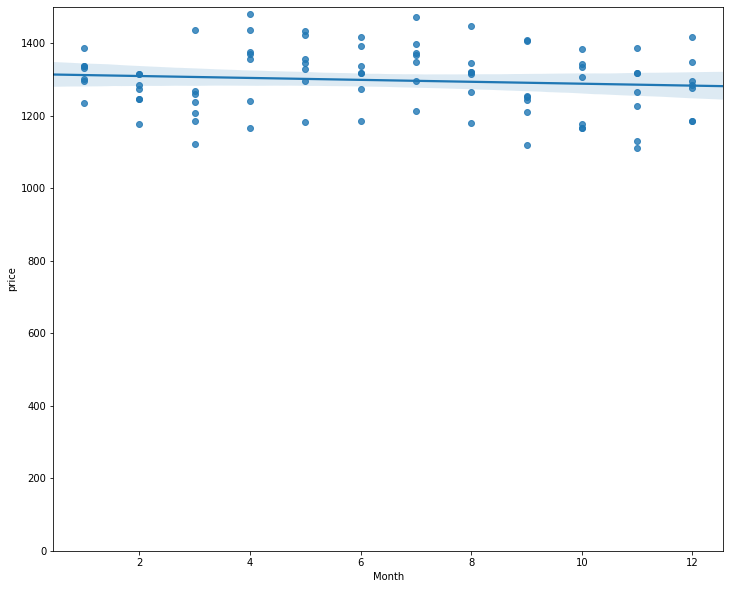

In [36]:
import warnings
width = 12
height = 10
warnings.filterwarnings('ignore')
plt.figure(figsize=(width, height))
sns.regplot(x="Month", y="price", data=df)
plt.ylim(0,)

## آماده سازی مدل چند متغیره ( چند پارامتر)

In [37]:
Z = df[[ 'Month' , 'visitor-count' , 'total-sales']]

In [38]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lm.intercept_

1339.3183615352946

In [40]:
lm.coef_

array([-7.78605018e-01,  5.30195727e-05, -4.00969835e-06])

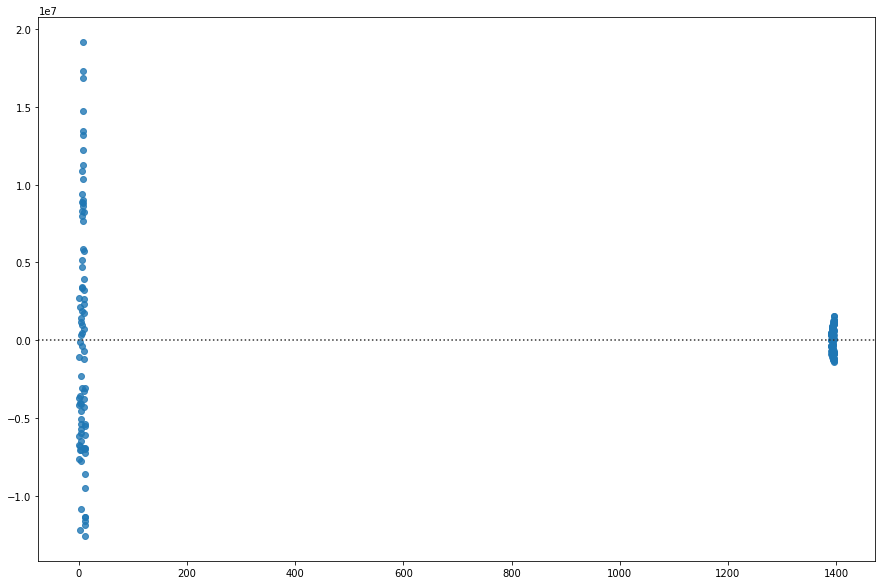

In [41]:
width = 15
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df[['Year','Month']], df[['visitor-count','total-sales']])
plt.show()

In [42]:
Y_hat = lm.predict(Z)


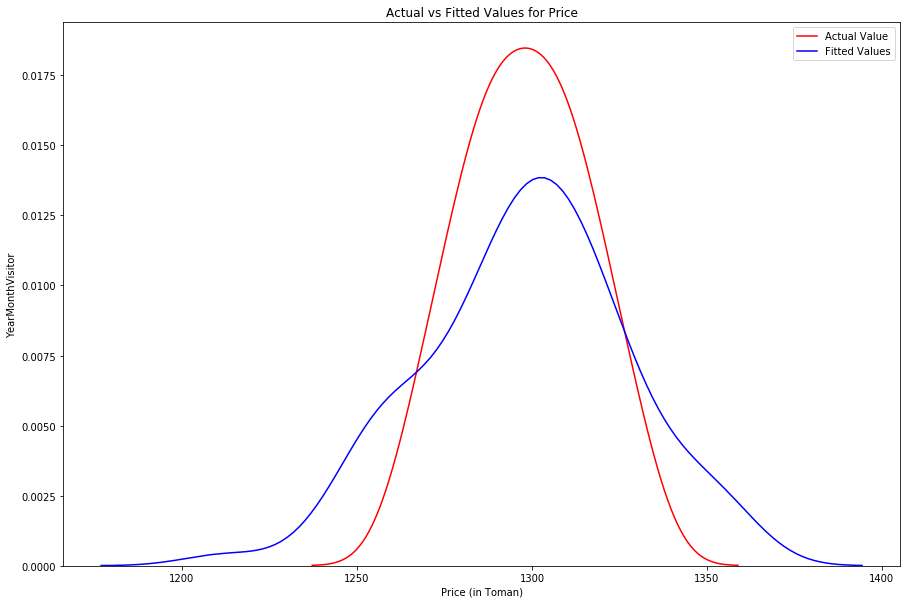

In [43]:
plt.figure(figsize=(width, height))

ax2 = sns.distplot(Yhat, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in Toman)')
plt.ylabel('YearMonthVisitor')
plt.show()
plt.close()

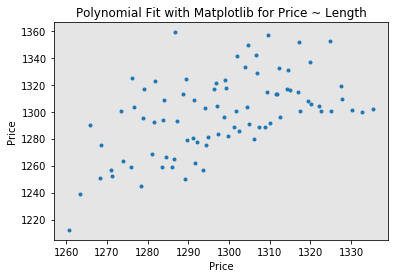

In [44]:

    plt.plot(Yhat, Y_hat, '.')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel("Price")
    plt.ylabel('Price')

    plt.show()
    plt.close()


## آماده سازی مدل چند جمله ای

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pr=PolynomialFeatures(degree=2)
pr
Z = df[[ 'Year' , 'Month']]

In [47]:
Z_pr=pr.fit_transform(Z)
Z_pr.shape

(84, 6)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  7392.445455462662


## پیش بینی مقادیر فروش و تعداد توریست ومیانگین قیمت بر اساس رگرسیون خطی

## LinearRegression

Regression Single Parameter for TotalSales_Value =>  
 [17274959.77289378 18439585.6994672  19604211.62604063 20768837.55261406
 21933463.47918748 23098089.40576091 24262715.33233433 25427341.25890776
 26591967.18548118 27756593.11205461 28921219.03862804 30085844.96520147] 




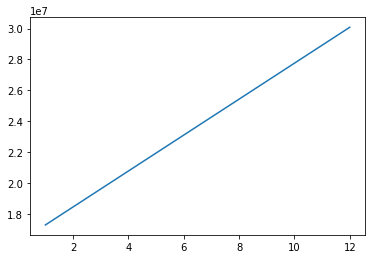

Regression Single Parameter for VisitorsCount_Value =>  
 [17274959.77289378 18439585.6994672  19604211.62604063 20768837.55261406
 21933463.47918748 23098089.40576091 24262715.33233433 25427341.25890776
 26591967.18548118 27756593.11205461 28921219.03862804 30085844.96520147] 




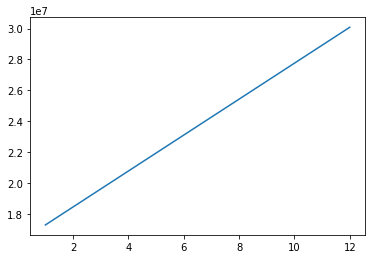

Regression Single Parameter for Price_Value =>  
 [1312.6245511  1309.97253963 1307.32052815 1304.66851668 1302.01650521
 1299.36449373 1296.71248226 1294.06047079 1291.40845931 1288.75644784
 1286.10443637 1283.4524249 ] 




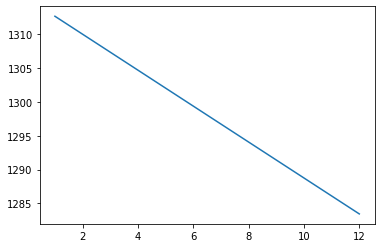

In [52]:
X = df[['Month']]
Y = df['total-sales']
new_input=np.arange(1, 13, 1).reshape(-1,1)
lm = LinearRegression()
lm.fit(X, Y)
lm
yhat=lm.predict(new_input)

print("Regression Single Parameter for TotalSales_Value => " , "\n", yhat[::], "\n\n")
plt.plot(new_input, yhat)
plt.show()




X = df[['Month']]
Y = df['total-sales']
new_input=np.arange(1, 13, 1).reshape(-1,1)
lm = LinearRegression()
lm.fit(X, Y)
lm
yhat=lm.predict(new_input)

print("Regression Single Parameter for VisitorsCount_Value => " , "\n", yhat[::], "\n\n")
plt.plot(new_input, yhat)
plt.show()







X = df[['Month']]
Y = df['price']
new_input=np.arange(1, 13, 1).reshape(-1,1)
lm = LinearRegression()
lm.fit(X, Y)
lm
yhat=lm.predict(new_input)

print("Regression Single Parameter for Price_Value => " , "\n", yhat[::], "\n\n")
plt.plot(new_input, yhat)
plt.show()

## پیش بینی مقادیر فروش تعداد توریست و میانگین قیمت بر اساس توابع چند پارامتری متفاوت در پکیج های متفاوت 
## Z Multi

In [53]:
# fit the model 
lm.fit(Z, df['total-sales'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['total-sales']))
Y_predict_multifit = lm.predict(Z)
print( "Multi Parameters Z =>  Predicted TotalSales_Value => ", "\n", Y_predict_multifit[0:13] , "\n\n")



lm.fit(Z, df['visitor-count'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['visitor-count']))
Y_predict_multifit = lm.predict(Z)
print( "Multi Parameters Z =>  Predicted VisitorsCount_Value => ", "\n", Y_predict_multifit[0:13] , "\n\n")



lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
Y_predict_multifit = lm.predict(Z)
print( "Multi Parameters Z =>  Predicted Price_Value => ", "\n", Y_predict_multifit[0:13] , "\n\n")

The R-square is:  0.4853476964204196
Multi Parameters Z =>  Predicted TotalSales_Value =>  
 [ 7791258.00503731  8955883.93161011 10120509.85818386 11285135.78475761
 12449761.71133041 13614387.63790417 14779013.56447792 15943639.49105072
 17108265.41762447 18272891.34419823 19437517.27077103 20602143.19734478
 10952491.92765617] 


The R-square is:  0.12426012605025759
Multi Parameters Z =>  Predicted VisitorsCount_Value =>  
 [ 457525.26923078  510267.90859142  563010.54795206  615753.18731269
  668495.82667333  721238.466034    773981.10539463  826723.74475527
  879466.3841159   932209.02347654  984951.66283718 1037694.30219781
  577571.36446887] 


The R-square is:  0.04091230977249216
Multi Parameters Z =>  Predicted Price_Value =>  
 [1335.44879312 1332.79678164 1330.14477017 1327.4927587  1324.84074722
 1322.18873575 1319.53672428 1316.88471281 1314.23270133 1311.58068986
 1308.92867839 1306.27666691 1327.84071244] 




## پیش بینی مقادیر فروش تعداد توریست و میانگین قیمت بر اساس مدل چند جمله ای 
## Polynomial

In [54]:
Y=df["total-sales"]
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print( "Polynomial =>  Predicted TotalSales_Value => ", "\n", ypipe[0:13] , "\n\n")
print()

Y=df["visitor-count"]
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print("Polynomial =>  Predicted VisitorsCount_Value => ", "\n", ypipe[61:74] , "\n\n")


Y=df["price"]
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print("Polynomial =>  Predicted Price_Value => ", "\n", ypipe[0:13] , "\n\n")


Polynomial =>  Predicted TotalSales_Value =>  
 [ 2560906.61564625  8387929.60451453 13173828.54236239 16918603.42918985
 19622254.2649969  21284781.04978354 21906183.78354977 21486462.4662956
 20025617.09802102 17523647.67872603 13980554.20841063  9396336.68707482
  3400673.16692831] 



Polynomial =>  Predicted VisitorsCount_Value =>  
 [ 557284.89805433 1119303.69654155 1555645.68326911 1866310.858237
 2051299.22144522 2110610.77289377 2044245.51258265 1852203.44051187
 1534484.55668141 1091088.86109129  522016.3537415    21769.4065498
  712749.47284065] 


Polynomial =>  Predicted Price_Value =>  
 [1277.34769035 1293.52676654 1306.54246489 1316.39478538 1323.08372802
 1326.60929281 1326.97147975 1324.17028883 1318.20572007 1309.07777345
 1296.78644898 1281.33174666 1287.7910213 ] 


